# 📘 Scenario-Based Advanced Internship Assignment

## 🔁 Introduction
This assignment contains real-world analytics problems using `pandas`, `numpy`, `matplotlib`, and `seaborn`. You are expected to write code for each scenario and explain your findings.

---
## 🔷 Scenario 1: Product Performance Analysis

### Problem Statement
Identify top contributing product categories and find underperformers despite high pricing.

### 🧠 Instructions:
1. Compute total revenue by `Item_Type`
2. Sort and calculate cumulative revenue %
3. Identify high MRP but low sales products

### ✍️ Your Task:

In [ ]:
# TODO: Write code to analyze top contributors using Pareto principle
# and detect underperformers with high MRP but low sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Load data
df = pd.read_csv('big_mart_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
total_revenue = df.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)

cumulative_revenue = total_revenue.cumsum() / total_revenue.sum() * 100
top_categories = cumulative_revenue[cumulative_revenue <= 80].index.tolist()
print("Top contributing categories (80/20 rule):", top_categories)


Top contributing categories (80/20 rule): ['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene']


---
## 🔷 Scenario 2: Seasonal Outlet Insights

### Problem Statement
Simulate monthly performance of outlets and visualize trends.

### 🧠 Instructions:
1. Add random `Month` column
2. Group by `Outlet_Identifier` and `Month`
3. Plot monthly sales trend

### ✍️ Your Task:

In [57]:
import random
random.seed(18)

df["month"]=np.random.randint(1,13,len(df["Item_Fat_Content"]))

In [103]:
x = df["month"]
y = df.groupby(["month","Outlet_Identifier"])["Item_Outlet_Sales"].sum().reset_index()

In [105]:
y

,month,Outlet_Identifier,Item_Outlet_Sales
0,1,OUT010,13075.6462
1,1,OUT013,163535.7934
2,1,OUT017,171015.3906
3,1,OUT018,142760.1702
4,1,OUT019,13694.8402
...,...,...,...
115,12,OUT027,281684.6666
116,12,OUT035,170656.5244
117,12,OUT045,187858.7990
118,12,OUT046,182280.7266


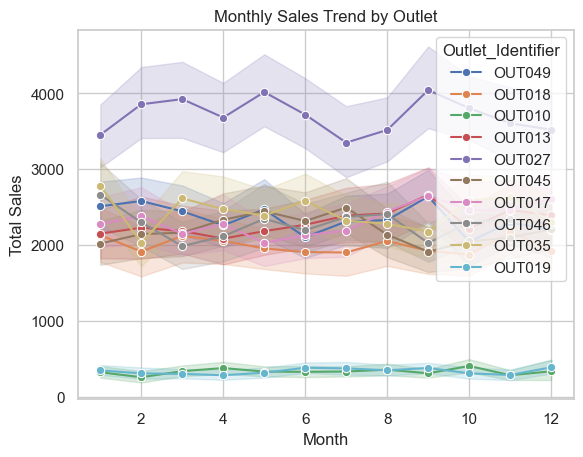

In [119]:
sns.lineplot(df, x = x,y="Item_Outlet_Sales",hue='Outlet_Identifier',marker='o')
plt.title('Monthly Sales Trend by Outlet')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

---
## 🔷 Scenario 3: Price Band Segmentation

### Problem Statement
Segment items into price bands and analyze sales pattern.

### 🧠 Instructions:
1. Use `pd.cut()` or `pd.qcut()` to create bands
2. Analyze sales by band
3. Create a boxplot

### ✍️ Your Task:

In [131]:
df["band"] = pd.qcut(df["Item_MRP"],q= 3, labels=["LOW","MEDIUM","HIGH"])

In [185]:
df1 =df.groupby("band")["Item_Outlet_Sales"].describe()
df1

C:\Users\valan\AppData\Local\Temp\ipykernel_68952\3382206882.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 =df.groupby("band")["Item_Outlet_Sales"].describe()


,count,mean,std,min,25%,50%,75%,max
band,,,,,,,,
LOW,2842.0,1099.633828,786.103899,33.2900,523.48525,951.4282,1534.0032,5093.3700
MEDIUM,2840.0,2148.453141,1312.843156,107.8596,1224.57265,1997.0671,2960.1468,7759.8990
HIGH,2841.0,3296.148945,1995.524003,171.7764,1830.95000,3125.9310,4587.3620,13086.9648


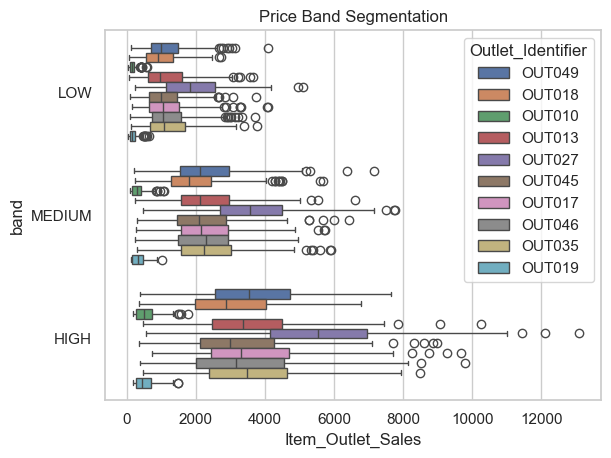

In [183]:
sns.boxplot(data =df,x="Item_Outlet_Sales",y="band",hue = "Outlet_Identifier")
plt.title("Price Band Segmentation")
plt.show()

---
## 🔷 Scenario 4: Stock Optimization Strategy

### Problem Statement
Evaluate items with high stock (weight) but low sales.

### 🧠 Instructions:
1. Use `Item_Weight` to simulate stock volume
2. Plot weight vs. sales as scatter

### ✍️ Your Task:

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

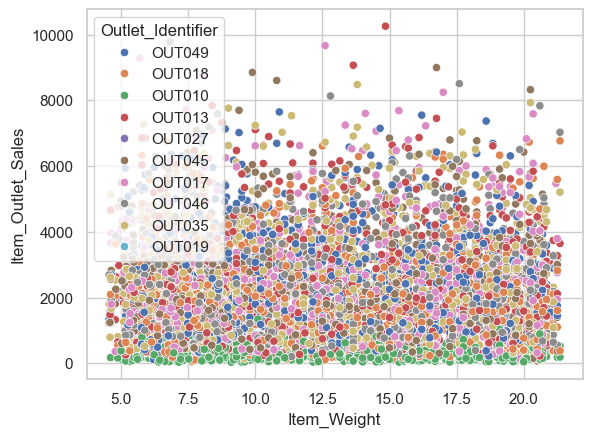

In [205]:
sns.scatterplot(data=df,x="Item_Weight",y='Item_Outlet_Sales',hue='Outlet_Identifier')

---
## 🔷 Scenario 5: Correlation with Revenue

### Problem Statement
Find features highly correlated with sales.

### 🧠 Instructions:
1. Use `df.corr()`
2. Visualize heatmap
3. List top 3 positive correlations

### ✍️ Your Task:

In [214]:
cor =df.corr(numeric_only=True)
cor.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,month
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,-0.011428
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.004397
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.001976
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,0.013167
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.002341


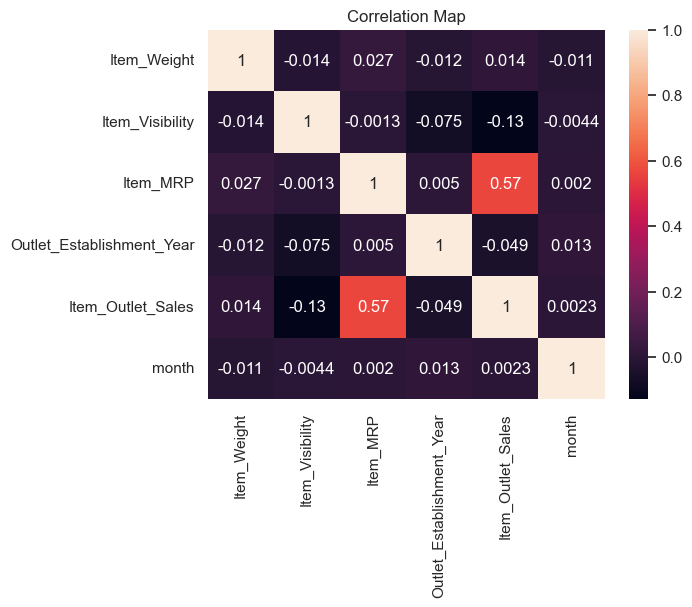

In [222]:
sns.heatmap(cor,annot=True)
plt.title("Correlation Map")
plt.show()

In [236]:
cor["Item_Outlet_Sales"].drop("Item_Outlet_Sales").sort_values(ascending=False).head(3)

Item_MRP       0.567574
Item_Weight    0.014123
month          0.002341
Name: Item_Outlet_Sales, dtype: float64